# Practica examen

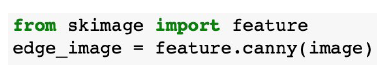

In [2]:
from skimage import data
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
image=rgb2gray(data.coins())

In [37]:
def mostrar_imagen(imagen):
    fig,ax=plt.subplots(figsize=[8,8])
    ax.imshow(imagen,cmap=plt.cm.gray)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

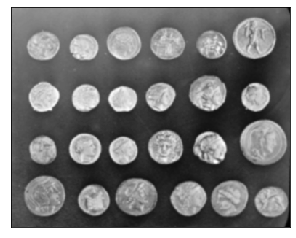

In [10]:
mostrar_imagen(edge_image)

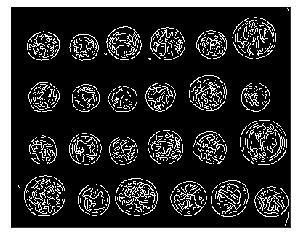

In [4]:
from skimage import feature
edge_image = feature.canny(image)
mostrar_imagen(edge_image)

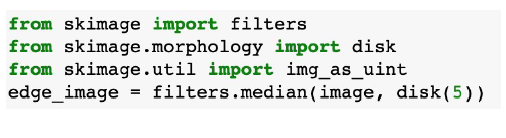

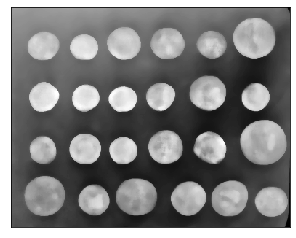

In [7]:
from skimage import filters
from skimage.morphology import disk
edge_image = filters.median(image,disk(5))
mostrar_imagen(edge_image)

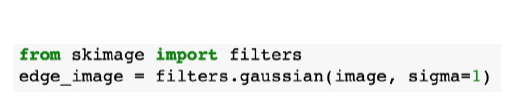

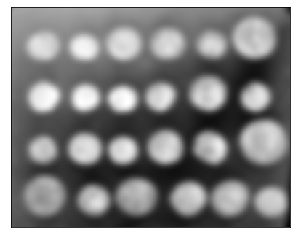

In [13]:
from skimage import filters
edge_image = filters.gaussian(image,sigma=5)
mostrar_imagen(edge_image)

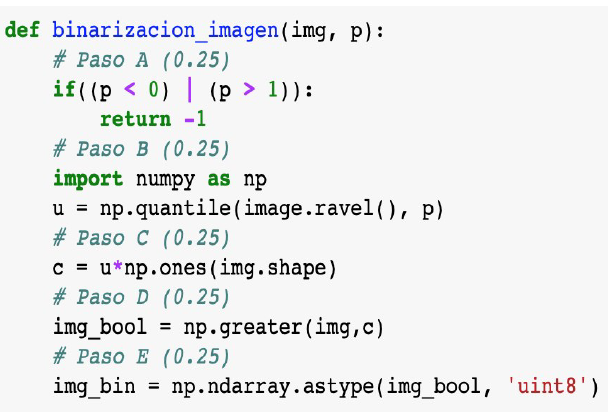

In [20]:
def binarizacion_imagen(img,p):
    if((p<0)|(p>1)):
        return -1
    import numpy as np
    u = np.quantile(image.ravel(),p)
    print(u)
    c=u*np.ones(img.shape)
    img_bool = np.greater(img,c)
    img_bin = np.ndarray.astype(img_bool,'uint8')
    return img_bin

In [28]:
import numpy as np
arr = np.asanyarray([2,3]) 
np.greater(arr,[7,1])

array([False,  True])

35.0


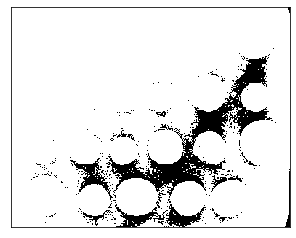

In [33]:
img_bina = binarizacion_imagen(image,0.10)
mostrar_imagen(img_bina)

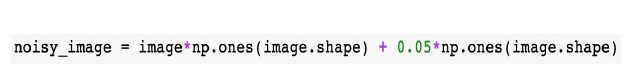

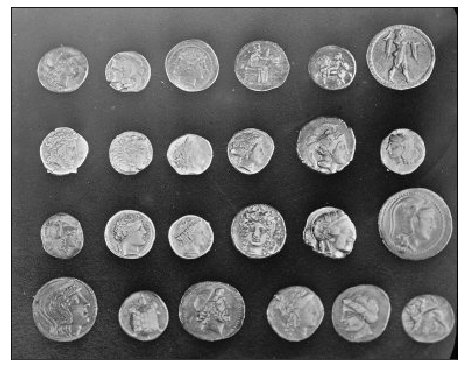

In [40]:
noisy_image = image*np.ones(image.shape)+0.05*np.ones(image.shape)
mostrar_imagen(noisy_image)

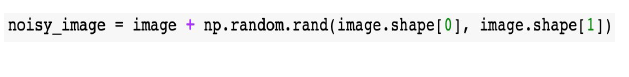

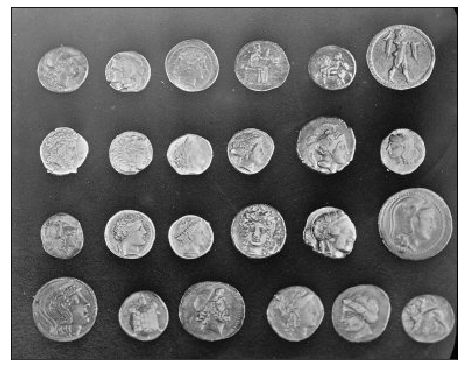

In [38]:
noisy_image = image+np.random.rand(image.shape[0],image.shape[1])
mostrar_imagen(noisy_image)

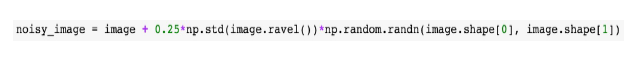

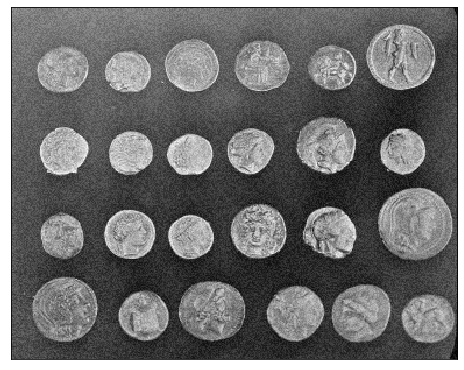

In [44]:
noisy_image = image+0.75*np.std(image.ravel())*np.random.rand(image.shape[0],image.shape[1])
mostrar_imagen(noisy_image)

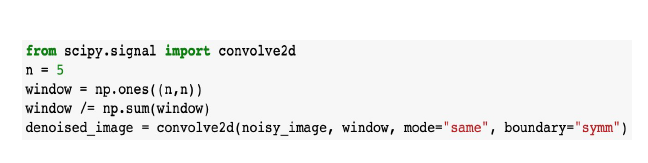

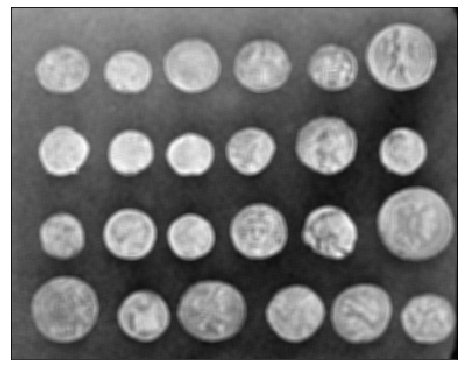

In [47]:
from scipy.signal import convolve2d
n=5
window=np.ones((n,n))
window/=np.sum(window)
denoised_image = convolve2d(noisy_image,window,mode='same',boundary='symm')
mostrar_imagen(denoised_image)

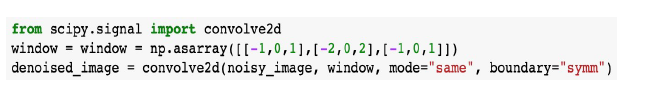

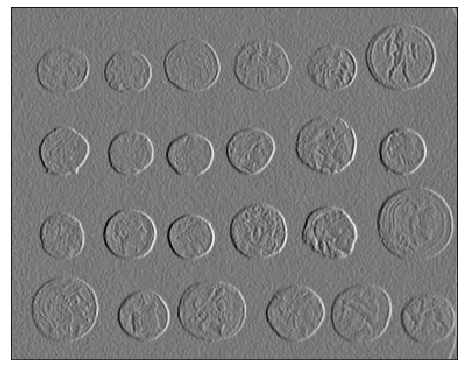

In [51]:
from scipy.signal import convolve2d
window=np.asarray([[-1,0,1],[-2,0,2],[-1,0,1]])
denoised_image = convolve2d(noisy_image,window,mode='same',boundary='symm')
mostrar_imagen(denoised_image)

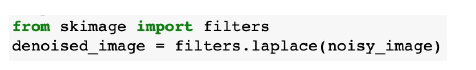

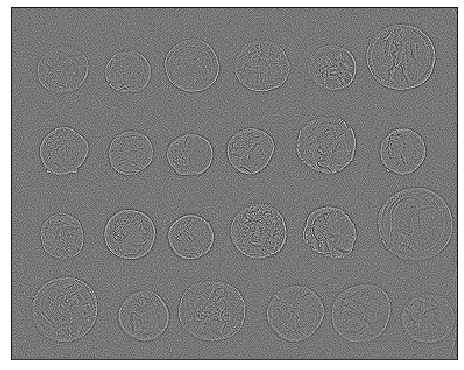

In [53]:
from skimage import filters
denoised_image = filters.laplace(noisy_image)
mostrar_imagen(denoised_image)